In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Load Dataset
data=pd.read_csv('./Concrete_DataNew.csv')
data.head()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [22]:
data.describe()

,Cement,Blast,Fly_Ash,Water,Superplasticizer,CA,FA,Age,CMS
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [3]:
# importing package
import pandas_profiling as pp
from IPython.display import IFrame

# Profile Report
Concrete_DataNew = pp.ProfileReport(data)
Concrete_DataNew.to_file('Concrete_DataNew.html')
display(IFrame('Concrete_DataNew.html', width=900, height=350))

In [18]:
#Correlation Columns with Output
cor = data.corr()
cor_target = abs(cor['CMS'])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.7]
relevant_features.sort_values(ascending=False)

CMS    1.0
Name: CMS, dtype: float64

In [19]:
#Find Independent Column Correlations
def correlation(dataset,threshold):
    col_corr= [] # List of correlated columns
    corr_matrix=dataset.corr() #finding correlation between columns
    for i in range (len(corr_matrix.columns)): #Number of columns
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking correlation between columns
                colName=(corr_matrix.columns[i], corr_matrix.columns[j]) #getting correlated columns
                col_corr.append(colName) #adding correlated column name
    return col_corr #returning set of column names
col=correlation(data,0.7)
print('Correlated columns @ 0.7:', col)

Correlated columns @ 0.7: []


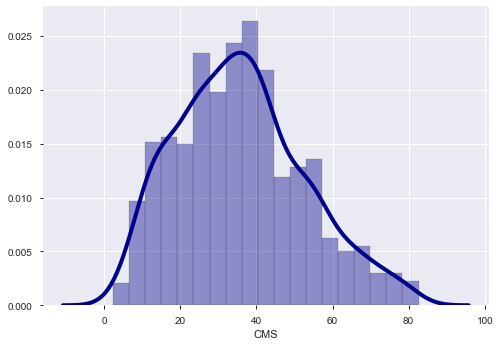

In [6]:
# Density Plot and Histogram of Output Variable
sns.distplot(data['CMS'], hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

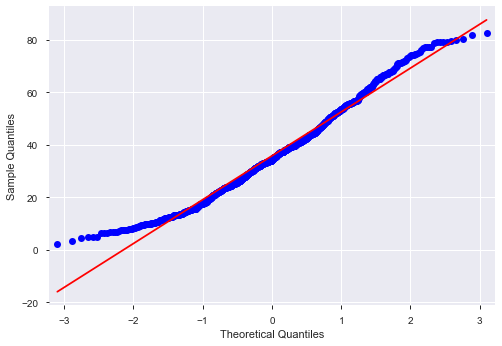

In [7]:
from statsmodels.graphics.gofplots import qqplot
import pylab
# q-q plot
qqplot(data['CMS'],line='s')
pylab.show()

In [17]:
#Normality test - Shapiro-Wilk Test

#   p <= alpha(0.05): reject H0, not normal.
#   p > alpha(0.05): fail to reject H0, normal.

from scipy.stats import shapiro
stat, p = shapiro(data['CMS'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.980, p=0.000
Sample does not look Gaussian (reject H0)


In [8]:
#Create Standard Model

#Define x and y variable
x = data.drop('CMS',axis=1).values
y = data['CMS'].values

#Training and Test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

#Script for Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.fit_transform(x_test)

x_2 = sc.fit_transform(x)

In [9]:
#Create Model
for name,method in [('Linear regression', LinearRegression())]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)

print('\nOriginal Model')
print('\nMethod: {}'.format(name))   

#Coefficents
print('\nIntercept: {:.2f}'.format(float(method.intercept_)))
coeff_table=pd.DataFrame(np.transpose(method.coef_),data.drop('CMS',axis=1).columns,columns=['Coefficients'])
print(coeff_table)
    
#R2,MAE,MSE and RMSE
print('\nR2: {:.2f}'.format(metrics.r2_score(y_test,predict)))
print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, predict)))  
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, predict)))  
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predict)))) 


Original Model

Method: Linear regression

Intercept: 35.95
                  Coefficients
Cement               13.027382
Blast                 8.952089
Fly_Ash               5.955866
Water                -2.849777
Superplasticizer      1.737942
CA                    1.592146
FA                    2.035610
Age                   7.219311

R2: 0.62
Mean Absolute Error: 8.22
Mean Squared Error: 113.66
Root Mean Squared Error: 10.66


In [10]:
#VIF Factors
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = data._get_numeric_data() #This line will drop non-numeric cols
x = data.drop('CMS',axis=1)

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif.sort_values('VIF Factor')

,VIF Factor,features
7,1.699459,Age
1,3.329127,Blast
2,4.147833,Fly_Ash
4,5.471094,Superplasticizer
0,15.456717,Cement
6,72.790995,FA
3,82.157569,Water
5,84.955779,CA


In [11]:
#Remove high VIF Variables (greater than 70) and Run Multivariate Regression

#Define x and y variable
x2 = data.drop(['CMS','Water','CA','FA'],axis=1).values
y2 = data['CMS'].values

#Training and Test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=0.2,random_state=100)

#Script for Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.fit_transform(x_test)

x_2 = sc.fit_transform(x2)

In [12]:
#Create Standard Model - Removing VIF Variable
for name,method in [('Linear regression', LinearRegression())]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)

print('\n Regression Model - using VIF information')
print('\nMethod: {}'.format(name))   

#Coefficents
print('\nIntercept: {:.2f}'.format(float(method.intercept_)))
coeff_table=pd.DataFrame(np.transpose(method.coef_),
                         data.drop(['CMS','Water','CA','FA'],axis=1).columns,
                         columns=['Coefficients'])
print(coeff_table)
    
#R2,MAE,MSE and RMSE
print('\nR2: {:.2f}'.format(metrics.r2_score(y_test,predict)))
print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, predict)))  
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, predict)))  
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predict)))) 


 Regression Model - using VIF information

Method: Linear regression

Intercept: 35.95
                  Coefficients
Cement               10.832104
Blast                 6.185626
Fly_Ash               3.916907
Superplasticizer      4.562773
Age                   6.451747

R2: 0.58
Mean Absolute Error: 8.62
Mean Squared Error: 125.09
Root Mean Squared Error: 11.18


In [13]:
# Construct some pipelines 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Create Pipeline

pipeline =[]

pipe_lm = Pipeline([('scl', StandardScaler()),
                    ('clf', LinearRegression())])
pipeline.insert(0,pipe_lm)

# Set grid search params 

modelpara =[]

param_gridlm = {'clf__fit_intercept':[True,False],
             'clf__normalize':[True,False], 
             'clf__copy_X':[True, False]}
modelpara.insert(0,param_gridlm)

In [14]:
#Define Gridsearch Function

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

def Gridsearch_cv(model, params):
    
    #Cross-validation Function
    cv2=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
        
    #GridSearch CV
    gs_clf = GridSearchCV(model, params, n_jobs=-1, cv=cv2,scoring='neg_mean_squared_error')
    gs_clf = gs_clf.fit(x_train2, y_train)
    model = gs_clf.best_estimator_
    
    #Nested CV
    scoresNested = cross_val_score(gs_clf, x_2, y2, 
                             scoring='neg_mean_squared_error', cv=5,
                             n_jobs= -1)    
      
    # Use best model and test data for final evaluation
    y_pred = model.predict(x_test2)

    #Identify Best Parameters to Optimize the Model
    bestpara=str(gs_clf.best_params_)
   
    #Output Heading
    print('\nOptimized Model')
    print('\nModel Name:',str(pipeline.named_steps['clf']))
        
    #Output Validation Statistics
    print('\nBest Parameters:',bestpara)
    
    #Test data accuracy of model with best params    
    print('\nIntercept: {:.2f}'.format(float(gs_clf.best_estimator_.named_steps['clf'].intercept_)))
    print('\nModel coefficients: ')   
    for name, score in zip(list(data.drop(['CMS','Water','CA','FA'],axis=1)),
                           gs_clf.best_estimator_.named_steps['clf'].coef_):
         print(name, round(score,2)) 
    
    #Print R2
    print('\nR2: {:0.2f}'.format(metrics.r2_score(y_test,y_pred)))
    #Print MSE and RMSE
    print('\nNestedCV MSE:  {:0.2f}'.format(np.mean(-scoresNested)))
    print('NestedCV RMSE:  {:0.2f}'.format(np.sqrt(np.mean(-scoresNested)))) 

In [15]:
#Run Models
for pipeline, modelpara in zip(pipeline,modelpara):
    Gridsearch_cv(pipeline,modelpara)


Optimized Model

Model Name: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Best Parameters: {'clf__copy_X': True, 'clf__fit_intercept': True, 'clf__normalize': True}

Intercept: 35.95

Model coefficients: 
Cement 10.83
Blast 6.19
Fly_Ash 3.92
Superplasticizer 4.56
Age 6.45

R2: 0.58

NestedCV MSE:  144.02
NestedCV RMSE:  12.00
